In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Load in the data
df = pd.read_csv("../data/all_basic_data.csv")

In [3]:
# Some constants
ndir = 10 # Number of directions from peeling off

In [4]:
# Print a header
df.head(n=10)

,halo_id,redshift,x,y,z,mvir,rvir,n_stars,stellar_mass,sfr_3,...,F277W_int,F300M_int,F335M_int,F356W_int,F360M_int,F410M_int,F430M_int,F444W_int,F460M_int,F480M_int
0,1955,10.0,0.226624,0.216377,0.109282,9.234144,0.001932,31967,7.20,1.31,...,29.884969,29.923696,29.946790,29.949927,29.944244,30.021190,29.977008,29.937638,29.942235,29.804002
1,2721,10.0,0.027271,0.335342,0.987246,9.499563,0.002361,50539,7.43,0.79,...,29.832259,29.877856,29.923394,29.939290,29.940309,29.959567,29.893601,29.896543,29.904001,29.802340
2,10158,10.0,0.296111,0.070418,0.311175,8.990255,0.001602,23168,7.04,0.43,...,30.792247,30.845234,30.891962,30.901009,30.902428,30.849527,30.792212,30.781773,30.766390,30.706044
3,12827,10.0,0.285522,0.432471,0.479433,9.695849,0.002751,116572,7.73,0.19,...,29.615865,29.661411,29.709806,29.725960,29.729763,29.608374,29.497049,29.519798,29.478483,29.444568
4,12907,10.0,0.274319,0.433607,0.452588,8.802573,0.001387,27501,7.11,0.55,...,30.311605,30.355300,30.398376,30.416435,30.416138,30.463976,30.399358,30.410006,30.437904,30.309920
5,14499,10.0,0.161716,0.394084,0.334233,9.429246,0.002244,58050,7.46,0.84,...,30.039922,30.088020,30.133297,30.144423,30.145461,30.173739,30.116714,30.099841,30.080944,30.011600
6,22470,10.0,0.201511,0.995079,0.519205,9.576676,0.002510,84158,7.64,0.35,...,30.098457,30.141799,30.182472,30.190774,30.192114,30.112523,30.035533,30.029949,29.995179,29.949622
7,23759,10.0,0.481061,0.240925,0.600468,10.052344,0.003610,464637,8.39,0.70,...,28.667609,28.698480,28.731172,28.740642,28.742376,28.563895,28.398063,28.435639,28.355822,28.341752
8,29558,10.0,0.170277,0.158444,0.983102,9.461591,0.002293,61656,7.50,0.99,...,29.397090,29.445778,29.493070,29.507610,29.509131,29.495268,29.447801,29.443778,29.454409,29.366637
9,31833,10.0,0.200272,0.487174,0.856606,8.991689,0.001598,39661,7.23,0.57,...,30.442257,30.470856,30.487304,30.494957,30.488144,30.547634,30.425603,30.436878,30.429075,30.279160


## Make some diagnostic diagrams

First we will make a BPT diagram for SPHINX-20 galaxies using the intrinsic emission.

Text(0.5, 1.0, '${\\rm Intrinsic\\ BPT\\ Diagram}$')

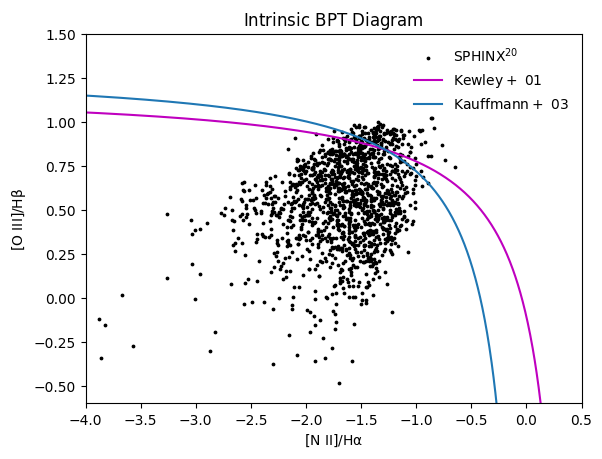

In [5]:
# BPT Diagram -- Intrinsic (i.e. no dust attenuation)
N2_over_Ha = df["N__2_6583.45A_int"] / df["H__1_6562.80A_int"]
O3_over_Hb = df["O__3_5006.84A_int"] / df["H__1_4861.32A_int"]

plt.scatter(np.log10(N2_over_Ha),np.log10(O3_over_Hb),c="k",s=3,label=r"${\rm SPHINX^{20}}$")

# Kewley 01
xxx = np.linspace(-4.2,0.3,1000)
yyy = 0.61/(xxx-0.47) + 1.19
plt.plot(xxx,yyy,c="m",label=r"${\rm Kewley+\ 01}$")

# Kauffmann
xxx = np.linspace(-4.2,0.,1000)
yyy = 0.61/(xxx-0.05) + 1.3
plt.plot(xxx,yyy,c="tab:blue",label=r"${\rm Kauffmann+\ 03}$")

plt.xlabel(r"${\rm [N\ II]/H\alpha}$")
plt.ylabel(r"${\rm [O\ III]/H\beta}$")

plt.xlim(-4,0.5)
plt.ylim(-0.6,1.5)

plt.legend(loc=1,frameon=False)
plt.title(r"${\rm Intrinsic\ BPT\ Diagram}$")

However, an observer doesn't see the the intrinsic emission. Below we can used the observed emission to make the BPT diagram

Text(0.5, 1.0, '${\\rm Dust-Attenuated\\ BPT\\ Diagram}$')

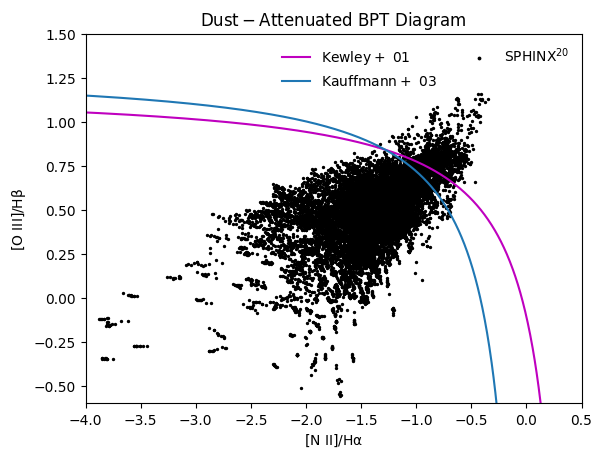

In [6]:
# BPT Diagram -- Dust attenuated

for i in range(ndir):
    N2_over_Ha = df[f"NII_6583.45_dir_{i}"] / df[f"HI_6562.8_dir_{i}"]
    O3_over_Hb = df[f"OIII_5006.84_dir_{i}"] / df[f"HI_4861.32_dir_{i}"]

    plt.scatter(np.log10(N2_over_Ha),np.log10(O3_over_Hb),c="k",s=2)

# Kewley 01
xxx = np.linspace(-4.2,0.3,1000)
yyy = 0.61/(xxx-0.47) + 1.19
plt.plot(xxx,yyy,c="m",label=r"${\rm Kewley+\ 01}$")

# Kauffmann
xxx = np.linspace(-4.2,0.,1000)
yyy = 0.61/(xxx-0.05) + 1.3
plt.plot(xxx,yyy,c="tab:blue",label=r"${\rm Kauffmann+\ 03}$")

plt.xlabel(r"${\rm [N\ II]/H\alpha}$")
plt.ylabel(r"${\rm [O\ III]/H\beta}$")

plt.xlim(-4,0.5)
plt.ylim(-0.6,1.5)

# Add sphinx to the legend
plt.scatter(-10,-10,c="k",s=3,label=r"${\rm SPHINX^{20}}$")

plt.legend(loc=1,frameon=False,ncol=2)
plt.title(r"${\rm Dust-Attenuated\ BPT\ Diagram}$")